In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# transformation function
transform = lambda x: x**3

# number of observations
n = 2000

# observed data
X = np.random.randint(1, 11, n)
X_trans = transform(X)

# noise term
W = np.random.randint(0, 3, n)

# true signal
Theta = X + W

In [3]:
# actual observation
obs = 5
obs_trans = transform(obs)

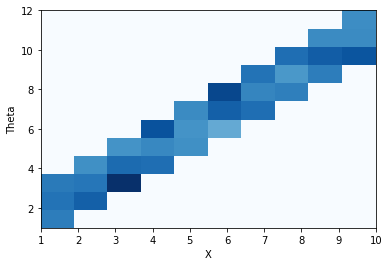

In [4]:
# visible linear relationship between X and Theta
plt.hist2d(x=X, y=Theta, cmap='Blues', bins=[10,12])
plt.xlabel('X')
plt.ylabel('Theta')
plt.show()

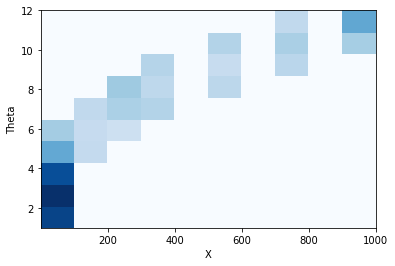

In [5]:
# Non-linear relationship between X cubed and Theta
plt.hist2d(x=X_trans, y=Theta, cmap='Blues')
plt.xlabel('X')
plt.ylabel('Theta')
plt.show()

In [6]:
def llms(X, Theta, obs):
  'Linear least means squared estimation'
  
  exp = np.mean(X)
  var = np.var(X)
  cov = np.cov(X, Theta)[0][1]

  print('Exp. ', round(exp, 2))
  print('Var. ', round(var, 2))
  print('Covar. ', round(cov,2))

  return np.mean(Theta) + cov/var*(obs-exp)

In [10]:
# the LMS estimator is simply the conditional expectation
# both give the same estimate (since not bound to some linear relationship)
print('X ', np.mean(Theta[X==obs]))
print('X^3 ', np.mean(Theta[X_trans==obs_trans]))

X  6.011428571428572
X^3  nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
# linear estimate from X
llms(X, Theta, obs)

Exp.  5.46
Var.  8.26
Covar.  8.29


5.986429896424294

In [9]:
# linear estimate from X cubed
llms(X_trans, Theta, obs_trans)

Exp.  298.86
Var.  106342.84
Covar.  868.23


5.028995971331403